In [1]:
#Social_Network_Ads.csv

**Importing the libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Importing the dataset**

In [3]:
df=pd.read_csv(r"Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
df.drop(columns=["User ID"], inplace=True)
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [6]:
df["Gender"] = df["Gender"].map({"Male" : 0, "Female" : 1})
df

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


In [7]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum() # gives no. of outliers

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

array([[<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'EstimatedSalary'}>,
        <AxesSubplot:title={'center':'Purchased'}>]], dtype=object)

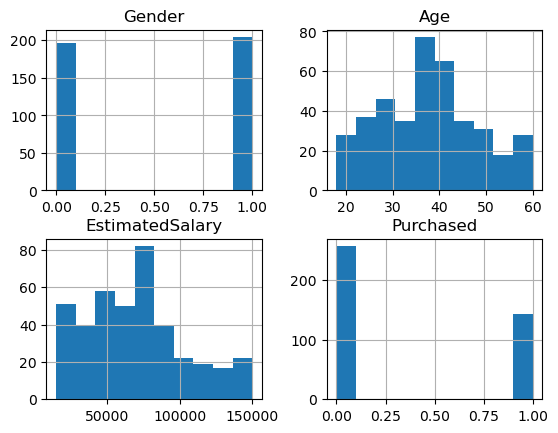

In [8]:
df.hist()

Since there is a Gaussian-like Distribution in 'Age' and 'EstimatedSalary', we need to do Standardization.but sccaling is not mandatory for randaom forest

**Splitting the dataset into the Training set and Test set**

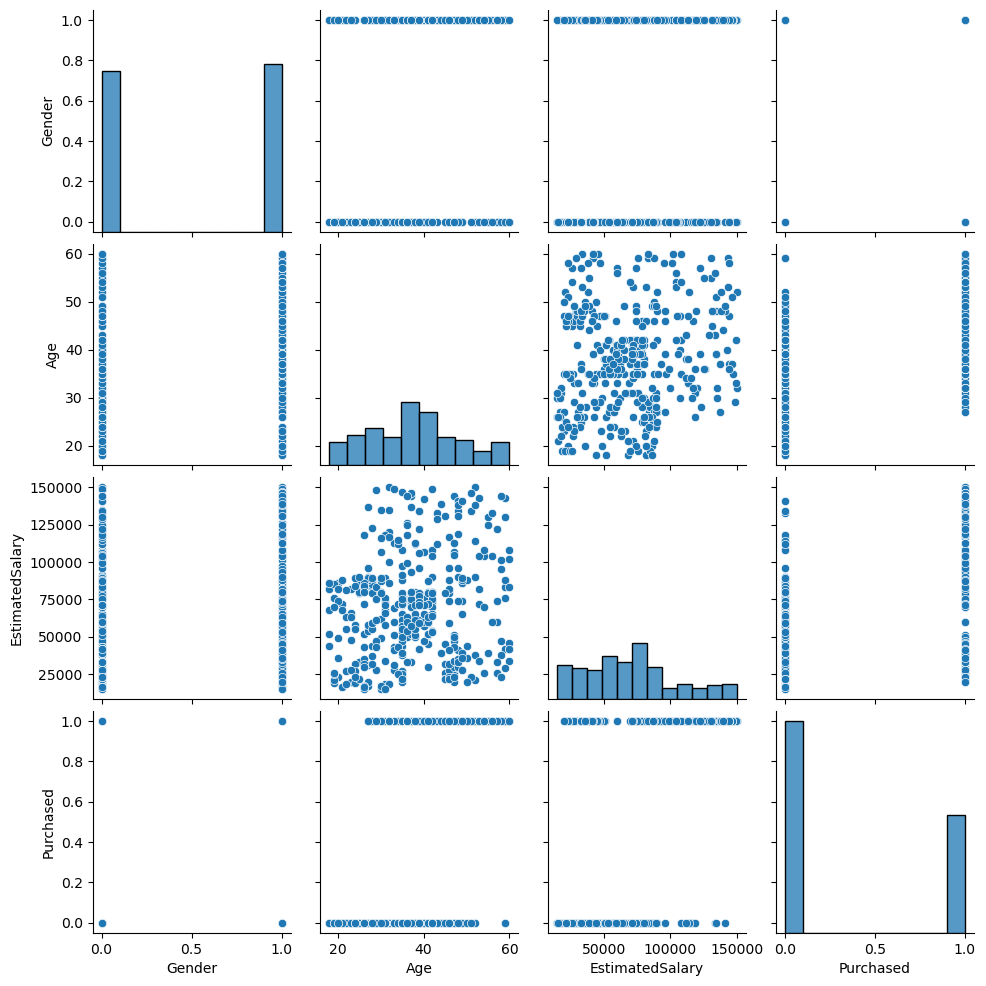

In [9]:
sns.pairplot(df)

In [10]:
y=np.array(df['Purchased'])
x=np.array(df.drop(['Purchased'], axis=1))

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=4)

In [12]:
print("x_train-shape : ", x_train.shape)
print("y_train-shape : ", y_train.shape)
print("x_test-shape : ", x_test.shape)
print("y_test-shape : ", y_test.shape)

x_train-shape :  (280, 3)
y_train-shape :  (280,)
x_test-shape :  (120, 3)
y_test-shape :  (120,)


**Feature Scaling**

Since Random Forest is made up of Decision Trees(DT), And DT doesn't require scaling. So Scaling is not mandatory for Random Forest also.



In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

**Fitting Random Forest to the Training set**

In [20]:
from sklearn.ensemble import RandomForestClassifier

we have 3 features in this data. max_depth=log(n_features)/log(2) =log(3)/log(2)=1.5 ~=2



In [21]:
rf = RandomForestClassifier(n_estimators= 100, max_depth = 2, max_features='sqrt')
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, max_features='sqrt')

**Predicting the Test set results**

In [22]:
y_pred = rf.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

**Making the Confusion Matrix**

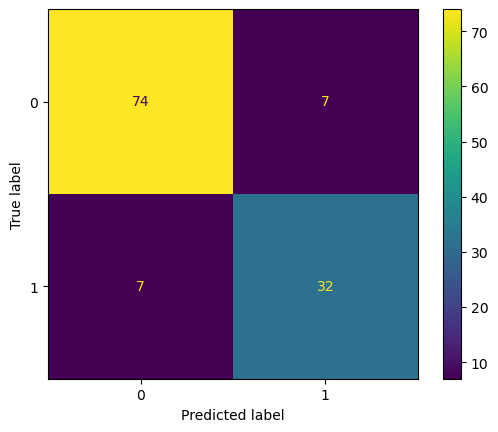

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cnf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=rf.classes_).plot()

**Visualising the Training set results**

In [24]:
from mlxtend.plotting import plot_decision_regions

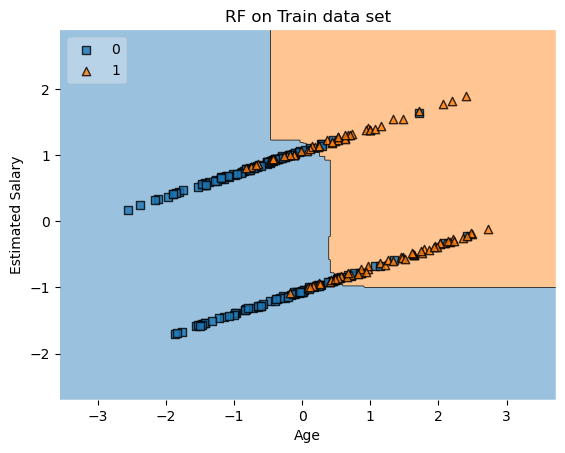

In [25]:
#Since we have more than 2 features, we are reducing the features 
#Using Dimension Reduction to consolidate all the features into 2 dimensions.

from sklearn.decomposition import PCA

rf = RandomForestClassifier(n_estimators= 100, max_depth = 2, max_features='sqrt')
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(x_train)
rf.fit(X_train2, y_train)



plot_decision_regions(X_train2, y_train, clf=rf, legend=2, )
# Adding axes annotations
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('RF on Train data set')
plt.show()

**Visualising the Test set results**

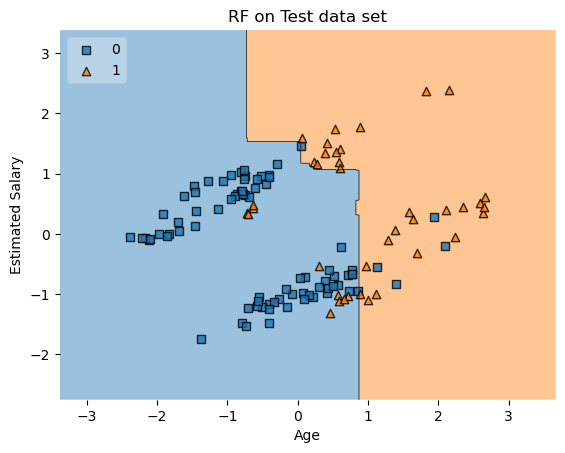

In [26]:
X_test2 = pca.fit_transform(x_test)
rf.fit(X_test2, y_test)



plot_decision_regions(X_test2, y_test, clf=rf, legend=2, )
# Adding axes annotations
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('RF on Test data set')
plt.show()

In [27]:
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None) 
print(F1_score)

[0.91358025 0.82051282]


In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator( rf,x_test, y_test)

plt.show()

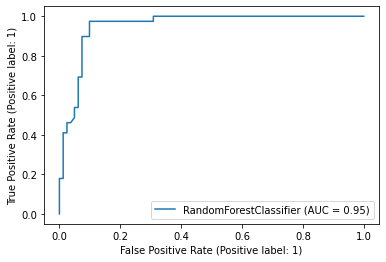